### Regression

In [2]:
import pandas as pd
data = pd.read_csv('botswana.tsv','\t')


In [3]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009E41208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B373240>]], dtype=object)

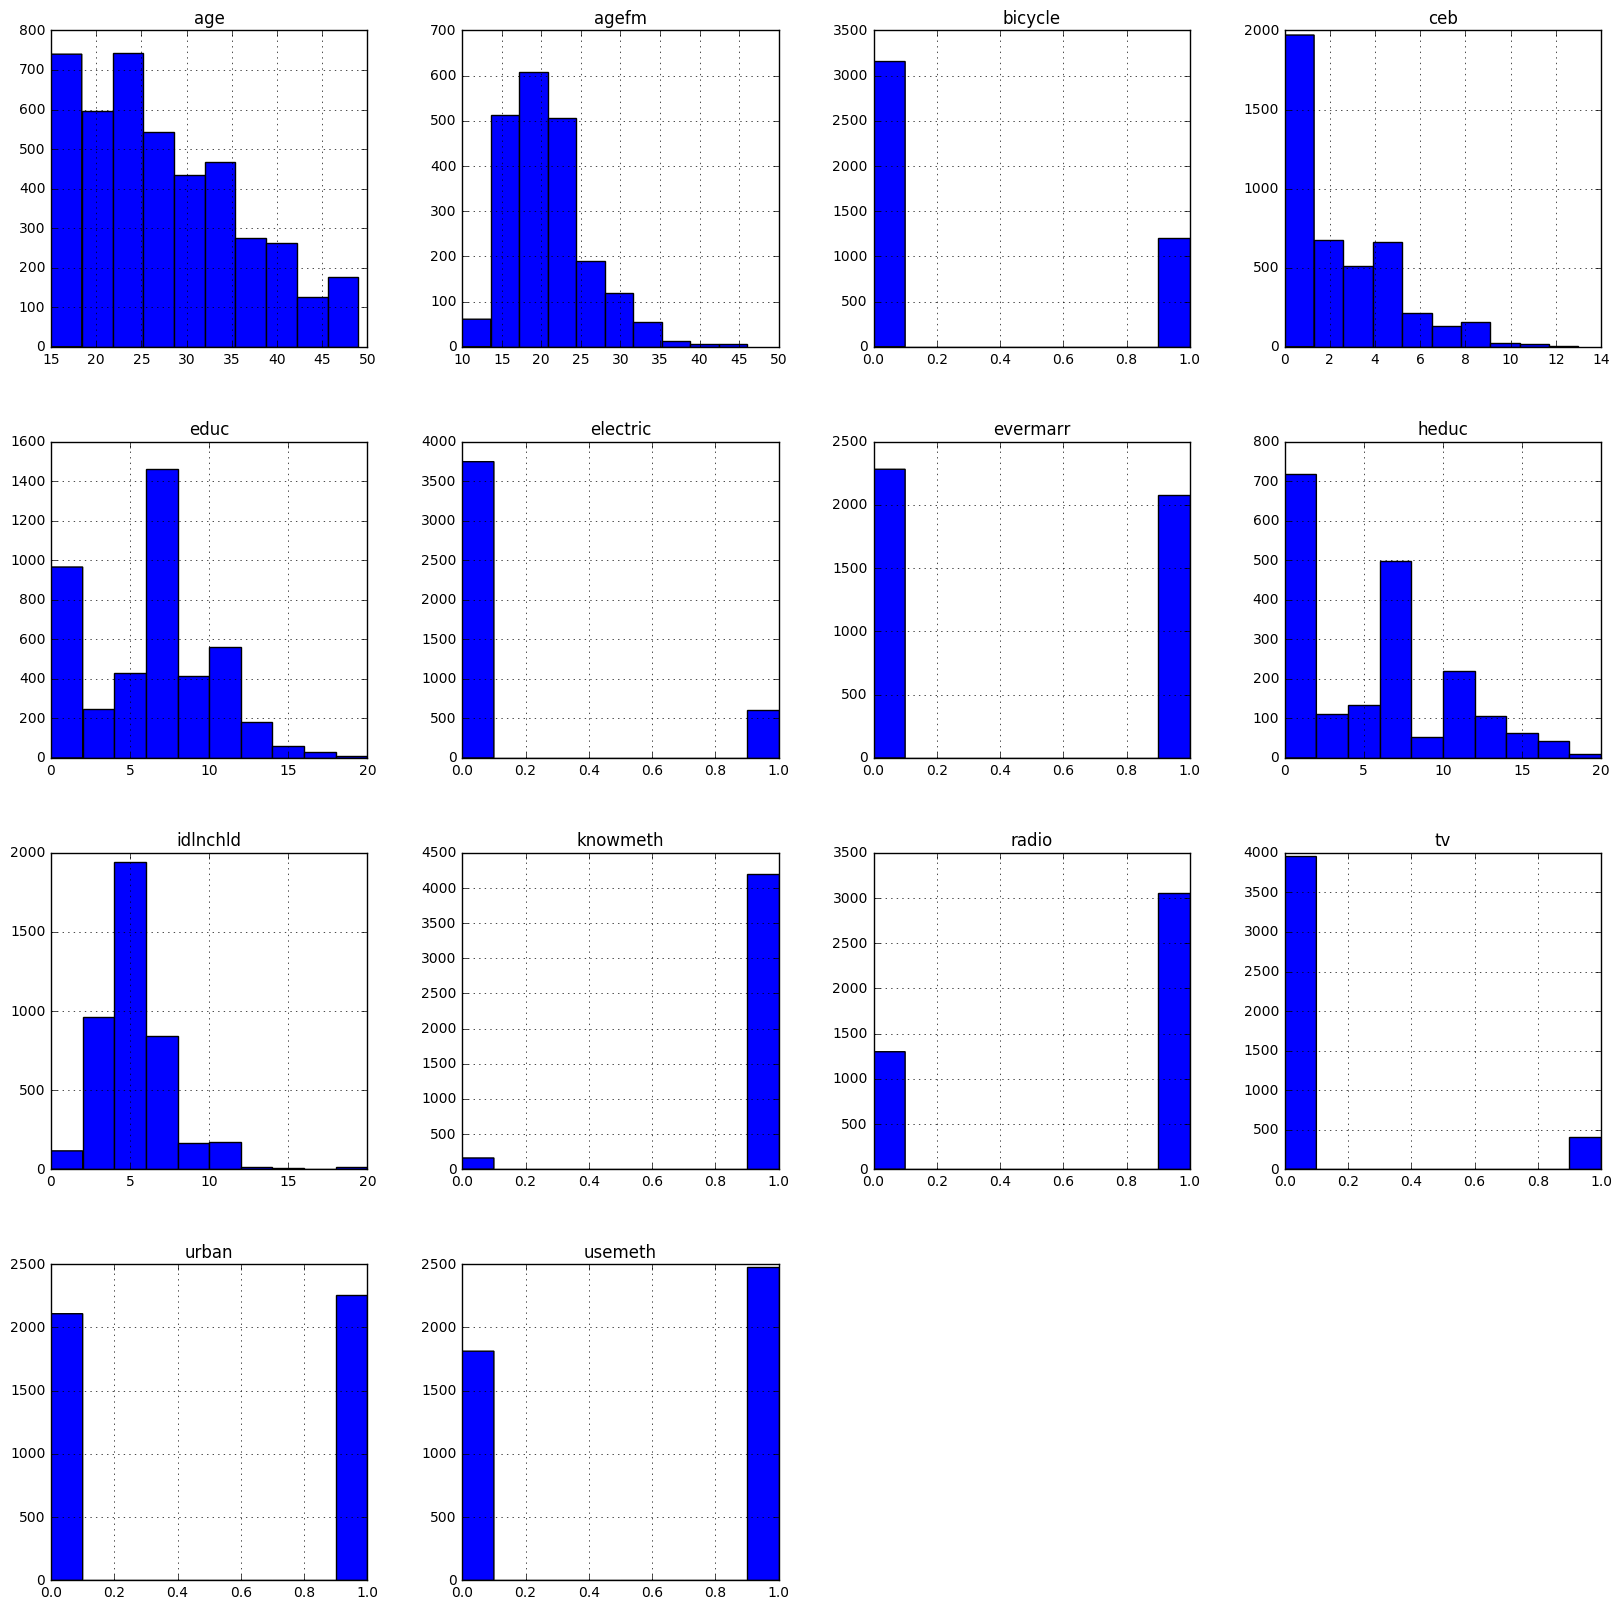

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
data.hist(figsize=(20,20), bins=10)

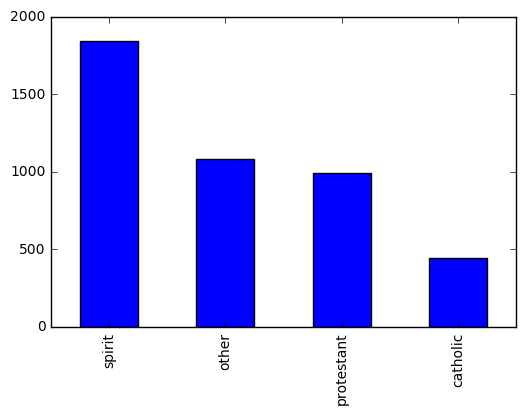

In [5]:
data['religion'].value_counts().plot(kind = 'bar')

В разных признаках пропуски возникают по разным причинам и должны обрабатываться по-разному.

Например, в признаке agefm пропуски стоят только там, где evermarr=0, то есть, они соответствуют женщинам, никогда не выходившим замуж. Таким образом, для этого признака NaN соответствует значению "не применимо".

In [6]:
import numpy as np
print np.min(data.agefm), np.max(data.agefm)
data['nevermarr'] = 0
data.ix[data['evermarr']==0, 'nevermarr']=1

10.0 46.0


In [7]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [8]:
data.drop('evermarr', axis=1)
data['agefm'].fillna(0, inplace=True)
data.ix[data['agefm']==0, 'heduc']=-1
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 16 columns):
ceb          4361 non-null int64
age          4361 non-null int64
educ         4361 non-null int64
religion     4361 non-null object
idlnchld     4241 non-null float64
knowmeth     4354 non-null float64
usemeth      4290 non-null float64
evermarr     4361 non-null int64
agefm        4361 non-null float64
heduc        4238 non-null float64
urban        4361 non-null int64
electric     4358 non-null float64
radio        4359 non-null float64
tv           4359 non-null float64
bicycle      4358 non-null float64
nevermarr    4361 non-null int64
dtypes: float64(9), int64(6), object(1)
memory usage: 545.2+ KB
None


In [9]:
len(data) - np.sum(data['heduc'].value_counts())

123L

In [10]:
data.drop('evermarr', axis=1)
data['agefm'].fillna(0, inplace=True)
data.ix[data['agefm']==0, 'heduc']=-1
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 16 columns):
ceb          4361 non-null int64
age          4361 non-null int64
educ         4361 non-null int64
religion     4361 non-null object
idlnchld     4241 non-null float64
knowmeth     4354 non-null float64
usemeth      4290 non-null float64
evermarr     4361 non-null int64
agefm        4361 non-null float64
heduc        4238 non-null float64
urban        4361 non-null int64
electric     4358 non-null float64
radio        4359 non-null float64
tv           4359 non-null float64
bicycle      4358 non-null float64
nevermarr    4361 non-null int64
dtypes: float64(9), int64(6), object(1)
memory usage: 545.2+ KB
None


In [11]:
data['idlnchld_noans'] = 0
data.ix[pd.isnull(data['idlnchld']), 'idlnchld_noans'] =1
data['idlnchld'].fillna(-1, inplace=True)

data['heduc_noans'] = 0
data.ix[pd.isnull(data['heduc']), 'heduc_noans'] =1
data['heduc'].fillna(-2, inplace=True)

data['usemeth_noans'] = 0
data.ix[pd.isnull(data['usemeth']), 'usemeth_noans'] =1
data['usemeth'].fillna(-1, inplace=True)

In [12]:
#data.dropna(inplace=True)
print len(data)*19

82859


In [15]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
m1 = smf.ols('ceb ~ age+educ+religion+idlnchld+knowmeth+usemeth+evermarr+agefm+heduc+urban+electric+radio+tv+bicycle+nevermarr+'\
             'idlnchld_noans+heduc_noans+usemeth_noans',             data=data)
fitted = m1.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Fri, 25 Nov 2016   Prob (F-statistic):               0.00
Time:                        16:48:55   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1

In [13]:
data.dropna(inplace=True)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4348 entries, 0 to 4360
Data columns (total 19 columns):
ceb               4348 non-null int64
age               4348 non-null int64
educ              4348 non-null int64
religion          4348 non-null object
idlnchld          4348 non-null float64
knowmeth          4348 non-null float64
usemeth           4348 non-null float64
evermarr          4348 non-null int64
agefm             4348 non-null float64
heduc             4348 non-null float64
urban             4348 non-null int64
electric          4348 non-null float64
radio             4348 non-null float64
tv                4348 non-null float64
bicycle           4348 non-null float64
nevermarr         4348 non-null int64
idlnchld_noans    4348 non-null int64
heduc_noans       4348 non-null int64
usemeth_noans     4348 non-null int64
dtypes: float64(9), int64(9), object(1)
memory usage: 679.4+ KB


Проверка на гомоскедастичность ошибки и поправка если они гетероскедастичны

In [16]:
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]

Breusch-Pagan test: p=0.000000


In [18]:
m2 = smf.ols('ceb ~ age+educ+religion+idlnchld+knowmeth+usemeth+evermarr+agefm+heduc+urban+electric+radio+tv+bicycle+nevermarr+'\
             'idlnchld_noans+heduc_noans+usemeth_noans',             data=data)
fitted_corrected = m2.fit(cov_type='HC1')
print fitted_corrected.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     777.0
Date:                Fri, 25 Nov 2016   Prob (F-statistic):               0.00
Time:                        18:08:36   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1

Удаляем незначимые признаки и проверяем насколько ухудшилась регрессия


In [28]:
m3 = smf.ols('ceb ~ age+educ+idlnchld+knowmeth+usemeth+evermarr+agefm+heduc+urban+electric+bicycle+nevermarr+'\
             'idlnchld_noans+heduc_noans+usemeth_noans',             data=data)
fitted3 = m3.fit(cov_type='HC1')
print fitted3.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1028.
Date:                Fri, 25 Nov 2016   Prob (F-statistic):               0.00
Time:                        18:36:35   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.4633      0.136    -10.

In [29]:
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted3.resid, fitted3.model.exog)[1]

Breusch-Pagan test: p=0.000000


Проверяем не стала ли модель хуже после удаления признаков с помощью критерий Фишера

In [31]:
print "F=%f, p=%f, k1=%f" % m2.fit().compare_f_test(m3.fit())

F=0.919236, p=0.467231, k1=5.000000


Удаляем из модели еще 2 признака usemeth и usemeth_noans

In [35]:
m4 = smf.ols('ceb ~ age+educ+idlnchld+knowmeth+evermarr+agefm+heduc+urban+electric+bicycle+nevermarr+'\
             'idlnchld_noans+heduc_noans',             data=data)
fitted4 = m4.fit(cov_type='HC1')
print fitted4.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1026.
Date:                Fri, 25 Nov 2016   Prob (F-statistic):               0.00
Time:                        18:47:50   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.5829      0.137    -11.

Проверяем не стала ли модель хуже после удаления признаков с помощью критерий Фишера

In [36]:
print "F=%f, p=%f, k1=%f" % m3.fit().compare_f_test(m4.fit())

F=92.890582, p=0.000000, k1=2.000000


Резюме: Модель сильно ухудшилась

(92.890582301097581, 3.1552009480386492e-40, 2.0)